#Pre-processing

Dataset Source: [UCI Repository](https://archive.ics.uci.edu/ml/machine-learning-databases/00389/)

Some Functions

In [ ]:
#Source: Lab 4 File of Teacher
def print_image(img):
  import matplotlib.pyplot as plt
  plt.imshow(img, cmap='gray')
  plt.show()


In [ ]:
def convert_png_to_numpy_array(filepath):
  import numpy as np
  from PIL import Image
  return  np.array(Image.open(filepath))

In [ ]:
def resolve_file_path(usage,folder_name,file_name):
  #usage should be 'Test' or 'Train'
  import os
  return os.path.join('/content','Hindi Digit Dataset',usage.capitalize(),folder_name,file_name);

In [ ]:
def extract_label_from_folder_name(folder_name):
  return folder_name[-1]

Download from Google Drive & Load into Numpy Arrays

In [ ]:
!gdown https://drive.google.com/uc?id=1Ow6wyIxOcL62dpm_sokFaoMDFJs9pE2A
!unzip -q Hindi\ Digit\ Dataset.zip

Downloading...
From: https://drive.google.com/uc?id=1Ow6wyIxOcL62dpm_sokFaoMDFJs9pE2A
To: /content/Hindi Digit Dataset.zip
100% 15.2M/15.2M [00:00<00:00, 259MB/s]
replace Hindi Digit Dataset/Test/digit_0/103277.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [ ]:
def prepare_dataset(usage):
  pictures=list()
  labels=list()
  import os
  folder_names= os.listdir(os.path.join('/content','Hindi Digit Dataset',usage))
  for folder_name in folder_names:
    file_names=os.listdir(os.path.join('/content','Hindi Digit Dataset',usage,folder_name))
    for file_name in file_names:
        filepath=resolve_file_path(usage,folder_name,file_name)
        pictures.append(convert_png_to_numpy_array(filepath))
        labels.append(extract_label_from_folder_name(folder_name))  
  
  return pictures,labels

In [ ]:
x_train,y_train=prepare_dataset('Train')
x_test,y_test=prepare_dataset('Test')

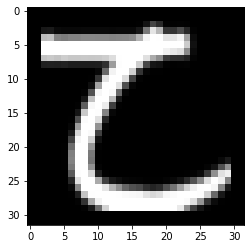

Label: 8


In [ ]:
#Example
print_image(x_train[197])
print('Label: '+y_train[197])

In [ ]:
print('Number of samples')
print(f'Training: {len(x_train)}')
print(f'Test {len(x_test)}')

Number of samples
Training: 17000
Test 3000


In [ ]:
#Each sample is a 32 x 32 grayscale picture
x_train[0].shape

(32, 32)

#Convolutional Neural Network

In [ ]:
import matplotlib.pyplot as plt
import gzip
import pickle
import numpy as np

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, losses, optimizers
from tensorflow.keras.utils import to_categorical

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
Total params: 92,672
Trainable params: 92,672
Non-traina

In [ ]:
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10, activation = 'softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 flatten (Flatten)           (None, 2048)              0

In [ ]:
batch_size = 64
epochs = 30
num_classes = 10

In [ ]:
model.compile(loss=losses.categorical_crossentropy, optimizer=optimizers.Adam(),metrics=['accuracy'])

In [ ]:
#X_val=X_val.reshape(-1, 32,32,1)
#print(X_val.shape)
#y_val = to_categorical(y_val)
#print(y_val.shape)

x_train=np.asarray(x_train)
y_train=np.asarray(y_train)
x_test=np.asarray(x_test)
y_test=np.asarray(y_test)

x_train=x_train.reshape(-1, 32,32,1)
print(x_train.shape)
y_train = to_categorical(y_train)
print(y_train.shape)

x_test=x_test.reshape(-1, 32,32,1)
print(x_train.shape)
y_test_org = y_test
y_test = to_categorical(y_test)
print(y_train.shape)



(17000, 32, 32, 1)
(17000, 10)
(17000, 32, 32, 1)
(17000, 10)


In [ ]:
training_history = model.fit(x_train, y_train,
                             batch_size=batch_size,
                             epochs=epochs,
                             verbose=1)

Epoch 1/30
266/266 [==============================] - 12s 5ms/step - loss: 0.7970 - accuracy: 0.9062
Epoch 2/30
266/266 [==============================] - 1s 4ms/step - loss: 0.0427 - accuracy: 0.9867
Epoch 3/30
266/266 [==============================] - 1s 4ms/step - loss: 0.0187 - accuracy: 0.9942
Epoch 4/30
266/266 [==============================] - 1s 4ms/step - loss: 0.0162 - accuracy: 0.9946
Epoch 5/30
266/266 [==============================] - 1s 4ms/step - loss: 0.0118 - accuracy: 0.9965
Epoch 6/30
266/266 [==============================] - 1s 4ms/step - loss: 0.0239 - accuracy: 0.9919
Epoch 7/30
266/266 [==============================] - 1s 4ms/step - loss: 0.0249 - accuracy: 0.9926
Epoch 8/30
266/266 [==============================] - 1s 4ms/step - loss: 0.0166 - accuracy: 0.9956
Epoch 9/30
266/266 [==============================] - 1s 4ms/step - loss: 0.0087 - accuracy: 0.9976
Epoch 10/30
266/266 [==============================] - 1s 4ms/step - loss: 0.0134 - accuracy: 0.996

In [ ]:
#@Zarif, please put the graph of accuracy vs epoch for both training & validation datasets
import plotly.graph_objects as go

# Training Accuracy vs Epoch plot
accuracy = training_history.history['accuracy']

fig = go.Figure()
fig.add_trace(go.Scatter(x=np.arange(start=1,stop=len(accuracy)), y=accuracy,
                    mode='lines+markers',
                    name='Training Accuracy'))
fig.update_layout(title = "Training Accuracy vs Epoch Graph", title_x = 0.5,
                  xaxis_title = 'Epoch',
                  yaxis_title = 'Training Accuracy',
                  width = 800,
                  height = 500)
fig.show()

In [ ]:
# Training Loss vs Epoch plot
loss = training_history.history['loss']

fig = go.Figure()
fig.add_trace(go.Scatter(x=np.arange(start=1,stop=len(loss)), y=loss,
                    mode='lines+markers',
                    name='Training Loss'))
fig.update_layout(title = "Training Loss vs Epoch Graph", title_x = 0.5,
                  xaxis_title = 'Epoch',
                  yaxis_title = 'Training Loss',
                  width = 800,
                  height = 500)
fig.show()

In [ ]:
predicted_classes = model.predict(x_test)
predicted_classes.shape, y_test.shape

((3000, 10), (3000, 10))

In [ ]:
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
predicted_classes.shape

(3000,)

In [ ]:
print(predicted_classes)
y_test_org=y_test_org.astype(np.int)
print(y_test_org)
y_test_org=y_test_org.astype(np.int)
print(y_test_org)
print(type(y_test_org[0]))

[8 8 8 ... 3 3 3]
[8 8 8 ... 3 3 3]
[8 8 8 ... 3 3 3]
<class 'numpy.int64'>


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning:

`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning:

`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Depreca

In [ ]:
#Print the test accuracy here
correctly_classified = len(np.where(predicted_classes==y_test_org)[0])
misclassified = y_test_org.shape[0] - correctly_classified
test_accuracy = correctly_classified/(correctly_classified + misclassified)*100
print("Test accuracy =",test_accuracy,"%")

Test accuracy = 99.5 %


Misclassified labels - 15


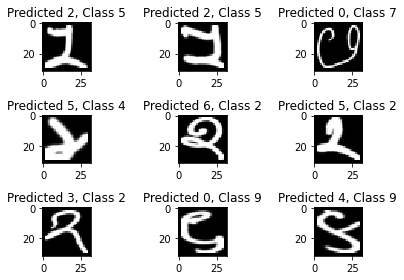

In [ ]:
correct = np.where(predicted_classes==y_test_org)[0]
print(f'Misclassified labels - {(y_test_org.shape[0]) - len(correct)}')
cnt = 0
for i in range (0,len(y_test_org)):
  if(predicted_classes[i]!=y_test_org[i]):
    
    plt.subplot(3,3,cnt+1)
    plt.imshow(x_test[i].reshape(32,32), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[i], y_test_org[i]))
    plt.tight_layout()
    cnt+=1
    if(cnt==9):
      break

In [ ]:
print(correct)

[   0    1    2 ... 2997 2998 2999]


0 0 1800
1 1 2400
2 2 1200
3 3 2700
4 4 900


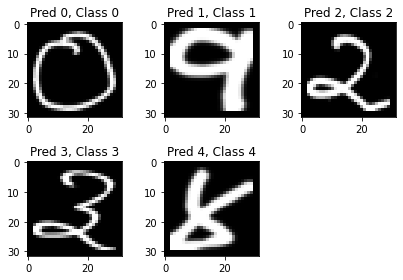

In [ ]:
#@ Muhammad please put a picture of a correctly classified sample of each digit
for numb in range(5):
  for i in range (0,len(y_test_org)):
    if predicted_classes[i] == numb and i in correct:
      print(numb,predicted_classes[i], i)
      plt.subplot(2,3,numb+1)
      plt.imshow(x_test[i].reshape(32,32), cmap='gray', interpolation='none')
      plt.title("Pred {}, Class {}".format(predicted_classes[i], y_test_org[i]))
      plt.tight_layout()
      break

5 5 300
6 6 1500
7 7 600
8 8 0
9 9 2100


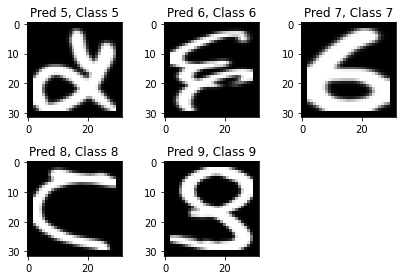

In [ ]:
for numb in range(5,10):
  for i in range (0,len(y_test_org)):
    if predicted_classes[i] == numb and i in correct:
      print(numb,predicted_classes[i], i)
      plt.subplot(2,3,numb-4)
      plt.imshow(x_test[i].reshape(32,32), cmap='gray', interpolation='none')
      plt.title("Pred {}, Class {}".format(predicted_classes[i], y_test_org[i]))
      plt.tight_layout()
      break

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

from keras.models import load_model

MODEL_PATH = './drive/My Drive/model.h5'

# Now save model in drive
model.save(MODEL_PATH)

# Load Model
model = load_model(MODEL_PATH)


Mounted at /content/drive


#UI function

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

from keras.models import load_model
MODEL_PATH = './drive/My Drive/model.h5'
model = load_model(MODEL_PATH)

Mounted at /content/drive


In [ ]:
def read_image(filename="user_input"):
## Resize to 32 x 32
  from PIL import Image
  picture=Image.open('/content/'+filename).resize((32,32),Image.LANCZOS).convert('L')
##convert to pixel array
  pixels=np.array(picture).reshape(-1,32,32,1)
##predict
  prediction=model.predict(pixels)
  return np.argmax(np.round(prediction),axis=1)[0],pixels

In [ ]:
# @ Zarif please put 5 pictures for each digit ( Total 5*10 = 50 grayscale pictures ) from the dataset  here
# You can use multiple cells
import random,os
import numpy as np
from PIL import Image

sample_count=5
dir='/content/Hindi Digit Dataset/Train'
folder_names=os.listdir(dir)
folder_names.sort()

In [ ]:
# function to draw n grayscale samples of a digit
# param => the digit to draw 
def show_samples_of_the_digit(digit):
  plot_idx=1
  folder_name=folder_names[digit]
  files_path=os.path.join(dir,folder_name)
  file_names=random.sample(os.listdir(files_path),sample_count)
  for file_name in file_names:
    filepath=os.path.join(dir,folder_name,file_name)
    img=np.array(Image.open(filepath))
    plt.subplot(1,sample_count,plot_idx)
    plt.imshow(img, cmap='gray')
    plt.title("Digit: {}".format(folder_name[-1]))
    plt.tight_layout()
    plot_idx+=1

In [ ]:
import matplotlib.pyplot as plt
import gzip
import pickle
import numpy as np

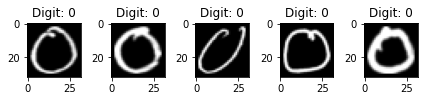

In [ ]:
# digit: 0
show_samples_of_the_digit(0)

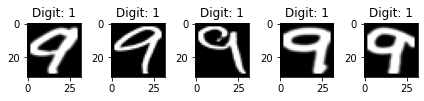

In [ ]:
# digit: 1
show_samples_of_the_digit(1)

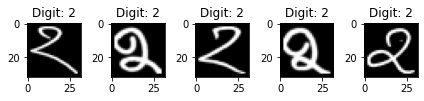

In [ ]:
# digit: 2
show_samples_of_the_digit(2)

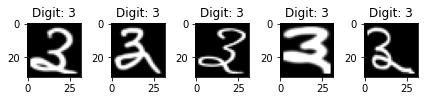

In [ ]:
# digit: 3
show_samples_of_the_digit(3)

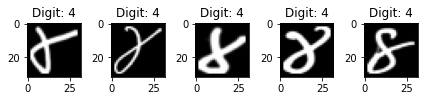

In [ ]:
# digit: 4
show_samples_of_the_digit(4)

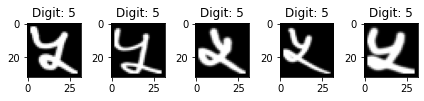

In [ ]:
# digit: 5
show_samples_of_the_digit(5)

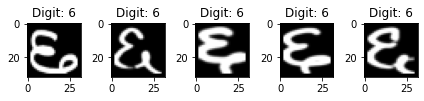

In [ ]:
# digit: 6
show_samples_of_the_digit(6)

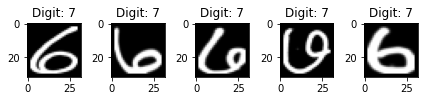

In [ ]:
# digit: 7
show_samples_of_the_digit(7)

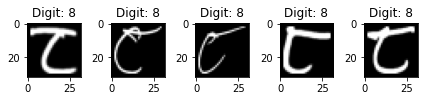

In [ ]:
# digit: 8
show_samples_of_the_digit(8)

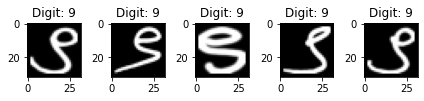

In [ ]:
# digit: 9
show_samples_of_the_digit(9)

In [ ]:
#UI code was modified from this source: https://gist.github.com/rickkk856/6a2800cc84dd8fd456074e5a467edc47

#@title <font color='red'>Hindi Digit Drawing Input (Modified from a Gist)</font> {vertical-output: true, run: "auto"}

import ipywidgets as widgets
from ipywidgets import Layout, Button, Box
from IPython.display import display, HTML, Image
from google.colab.output import eval_js
from base64 import b64decode

Square_Size = 256
Brush_Size = 20 #@param {type:"slider", min:0, max:100, step:5}
Expected_Digit = "1" #@param ["0", "1", "2","3","4","5","6","7","8","9"] {allow-input: true} 
filename = "user_image"#@param [] {allow-input: true}
filename = filename + ".png"

js_code = '''
<style>
  .colors-buttons div {
      width: 30px;
      height: 30px;
      margin: 2px;}
  div {
      display: flex;
  }
  canvas{border:1px solid black !important;}
</style>
<canvas id="myCanvas" width="%d" height="%d"></canvas>
<div class="colors-buttons">
  <div class="color" style="background-color: #000000;" id-color="#000000"></div>
  <div class="color" style="background-color: #FFFFFF;" id-color="#FFFFFF"></div>    
  <div class="color" style="background-color: #FFFF00;" id-color="#FFFF00"></div>
  <div class="color" style="background-color: #FF00FF;" id-color="#FF00FF"></div>
  <div class="color" style="background-color: #00FFFF;" id-color="#00FFFF"></div>
  <div class="color" style="background-color: #FF0000;" id-color="#FF0000"></div>
  <div class="color" style="background-color: #0000FF;" id-color="#0000FF"></div>
  <div class="color" style="background-color: #00FF00;" id-color="#00FF00"></div>
</div>
<script>
  var canvas = document.querySelector('canvas')
  var ctx = canvas.getContext('2d')
  ctx.fillStyle = 'black';
  ctx.fillRect( 0, 0, canvas.width, canvas.height)
  var Brush_Size = %d
  var button = document.querySelector('button')
  var mouse = {x: 0, y: 0}
  canvas.addEventListener('mousemove', function(e) {
    mouse.x = e.pageX - this.offsetLeft
    mouse.y = e.pageY - this.offsetTop
  })
  canvas.onmousedown = ()=>{
    ctx.beginPath()
    ctx.moveTo(mouse.x, mouse.y)
    
    canvas.addEventListener('mousemove', onPaint)
  }
  canvas.onmouseup = ()=>{
    canvas.removeEventListener('mousemove', onPaint)
  }
  var onPaint = ()=>{
    ctx.fillRect(mouse.x-( Brush_Size/2), mouse.y-(Brush_Size/2), Brush_Size, Brush_Size)
    ctx.stroke()
  }
  const colors = document.getElementsByClassName('color');
  Array.from(colors).forEach(color => {
      color.addEventListener('click', (event) => {
          const colorSelected = event.target.getAttribute('id-color');
          ctx.fillStyle = colorSelected;
      });
  });
    // FINISH BUTTON
  var data = new Promise(resolve=>{
    button.onclick = ()=>{
      resolve(canvas.toDataURL('image/jpg'))
    }
  })
</script>
'''


## Function to Appear Image Canvas
def draw(filename=filename,  w=Square_Size, h=Square_Size, Brush_Size=Brush_Size):
  display(HTML(js_code % (w, h, Brush_Size)))
  data = eval_js("data")
  binary = b64decode(data.split(',')[1])
  if AttributeError:
    pass
  with open(filename, 'wb') as f:
    f.write(binary)
  return len(binary)
  if button2.on_click(on_button_clicked2):
    pass
  

## Action for Reset Button
def on_button_clicked(b):
  with output:
    #display(HTML(canvas_html % ( w=$Square_Size, h=$Square_Size, Brush_Size=$Brush_Size)))
    data = eval_js("data")
    binary = b64decode(data.split(',')[1])
    with open(filename, 'wb') as f:
      f.write(binary)
  return len(binary)
  

## Show Save Button & Save outputs
output = widgets.Output()
button = widgets.Button(description="Read",style=dict(font_weight='bold'))
button.on_click(on_button_clicked)
display(button, output)

## Show Canvas for the First Time
draw(filename=filename,  w=Square_Size, h=Square_Size, Brush_Size=Brush_Size)
predicted_digit,drawnpic=read_image(filename)

if predicted_digit == int(Expected_Digit):
  button.style.button_color='DarkBlue'
else:
  button.style.button_color='Black'
button.description=(f'Prediction: {predicted_digit}')
display(button)

Button(description='Read', style=ButtonStyle(font_weight='bold'))

Output()

Button(description='Prediction: 6', style=ButtonStyle(button_color='Black', font_weight='bold'))

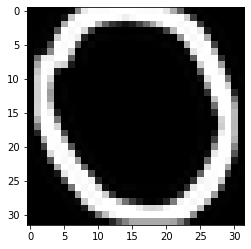

In [ ]:
plt.imshow(drawnpic.reshape(32,32), cmap='gray', interpolation='none')